In [1]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/world-coordinates/world_coordinates.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_2019_ncov_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_2019_ncov_deaths.csv
/kaggle/input/novel-corona-virus-2019-dataset/2019_nCoV_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_2019_ncov_recovered.csv


In [2]:
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

In [3]:
print('Last updated: ',datetime.now().strftime('%Y-%m-%d %H:%M:%S UTC'))

Last updated:  2020-02-15 09:14:28 UTC


In [4]:
wc = pd.read_csv("../input/world-coordinates/world_coordinates.csv")
df = pd.read_csv("../input/novel-corona-virus-2019-dataset/2019_nCoV_data.csv")

In [5]:
df

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1414,1415,02/13/2020 21:15:00,"Madison, WI",US,2020-02-05 21:53:02,1.0,0.0,0.0
1415,1416,02/13/2020 21:15:00,"Orange, CA",US,2020-02-01 19:53:03,1.0,0.0,0.0
1416,1417,02/13/2020 21:15:00,"San Antonio, TX",US,2020-02-13 18:53:02,1.0,0.0,0.0
1417,1418,02/13/2020 21:15:00,"Seattle, WA",US,2020-02-09 07:03:04,1.0,0.0,1.0


In [6]:
# Drop duplicate entries, if any
df.drop_duplicates(inplace=True)
df

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1414,1415,02/13/2020 21:15:00,"Madison, WI",US,2020-02-05 21:53:02,1.0,0.0,0.0
1415,1416,02/13/2020 21:15:00,"Orange, CA",US,2020-02-01 19:53:03,1.0,0.0,0.0
1416,1417,02/13/2020 21:15:00,"San Antonio, TX",US,2020-02-13 18:53:02,1.0,0.0,0.0
1417,1418,02/13/2020 21:15:00,"Seattle, WA",US,2020-02-09 07:03:04,1.0,0.0,1.0


In [7]:
# Remove columns not required for study
df.drop(['Sno','Last Update'], axis=1, inplace=True)
df.head()

,Date,Province/State,Country,Confirmed,Deaths,Recovered
0,01/22/2020 12:00:00,Anhui,China,1.0,0.0,0.0
1,01/22/2020 12:00:00,Beijing,China,14.0,0.0,0.0
2,01/22/2020 12:00:00,Chongqing,China,6.0,0.0,0.0
3,01/22/2020 12:00:00,Fujian,China,1.0,0.0,0.0
4,01/22/2020 12:00:00,Gansu,China,0.0,0.0,0.0


In [8]:
# List of affected provinces/states
aff_ps = df['Province/State'].unique()
print(aff_ps)
print("Total:", len(aff_ps))

['Anhui' 'Beijing' 'Chongqing' 'Fujian' 'Gansu' 'Guangdong' 'Guangxi'
 'Guizhou' 'Hainan' 'Hebei' 'Heilongjiang' 'Henan' 'Hong Kong' 'Hubei'
 'Hunan' 'Inner Mongolia' 'Jiangsu' 'Jiangxi' 'Jilin' 'Liaoning' 'Macau'
 'Ningxia' 'Qinghai' 'Shaanxi' 'Shandong' 'Shanghai' 'Shanxi' 'Sichuan'
 'Taiwan' 'Tianjin' 'Tibet' 'Washington' 'Xinjiang' 'Yunnan' 'Zhejiang'
 nan 'Chicago' 'Illinois' 'California' 'Arizona' 'Ontario'
 'New South Wales' 'Victoria' 'Bavaria' 'British Columbia' 'Queensland'
 'Chicago, IL' 'South Australia' 'Boston, MA' 'Los Angeles, CA'
 'Orange, CA' 'Santa Clara, CA' 'Seattle, WA' 'Tempe, AZ' 'Toronto, ON'
 'San Benito, CA' 'London, ON' 'Madison, WI' 'Cruise Ship'
 'Diamond Princess cruise ship' 'San Diego County, CA' 'San Antonio, TX']
Total: 62


In [9]:
# Number of cases in each Province/State
case_ps = df.groupby('Province/State', as_index=False)[['Confirmed','Deaths','Recovered']].max()
with pd.option_context('display.max_rows', None, 'display.max_columns', None): # Prevent truncation
    display(case_ps) # Maintain rich formatting by using display() instead of print()

,Province/State,Confirmed,Deaths,Recovered
0,Anhui,934.0,6.0,166.0
1,Arizona,1.0,0.0,0.0
2,Bavaria,7.0,0.0,0.0
3,Beijing,366.0,3.0,69.0
4,"Boston, MA",1.0,0.0,0.0
5,British Columbia,4.0,0.0,0.0
6,California,3.0,0.0,0.0
7,Chicago,1.0,0.0,0.0
8,"Chicago, IL",2.0,0.0,2.0
9,Chongqing,529.0,4.0,128.0


In [10]:
# List of affected countries
aff_c = df.Country.unique()
print(aff_c)
print("Total:", len(aff_c))

['China' 'US' 'Japan' 'Thailand' 'South Korea' 'Mainland China'
 'Hong Kong' 'Macau' 'Taiwan' 'Singapore' 'Philippines' 'Malaysia'
 'Vietnam' 'Australia' 'Mexico' 'Brazil' 'France' 'Nepal' 'Canada'
 'Cambodia' 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland'
 'United Arab Emirates' 'India' 'Italy' 'Sweden' 'Russia' 'Spain' 'UK'
 'Belgium' 'Others']
Total: 33


In [11]:
# Replacing Mainland China with China to make dataset consistent
df['Country'].replace({'Mainland China':'China'},inplace=True)

In [12]:
# Number of cases in each Country
case_c = df.groupby(['Country', 'Date']).sum().reset_index()
case_c = case_c.sort_values('Date', ascending=False)
case_c = case_c.drop_duplicates(subset = ['Country'])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  display(case_c.sort_values('Country')[['Country','Confirmed','Deaths','Recovered']].reset_index(drop=True))

,Country,Confirmed,Deaths,Recovered
0,Australia,15.0,0.0,8.0
1,Belgium,1.0,0.0,0.0
2,Brazil,0.0,0.0,0.0
3,Cambodia,1.0,0.0,1.0
4,Canada,7.0,0.0,1.0
5,China,63841.0,1488.0,6982.0
6,Finland,1.0,0.0,1.0
7,France,11.0,0.0,2.0
8,Germany,16.0,0.0,1.0
9,Hong Kong,53.0,1.0,1.0


In [13]:
# Total number of cases
print("Total Confirmed:",case_c['Confirmed'].sum())
print("Total Deaths:",case_c['Deaths'].sum())
print("Total Recovered:",case_c['Recovered'].sum())

Total Confirmed: 64422.0
Total Deaths: 1491.0
Total Recovered: 7064.0


Text(0, 0.5, 'Number of cases')

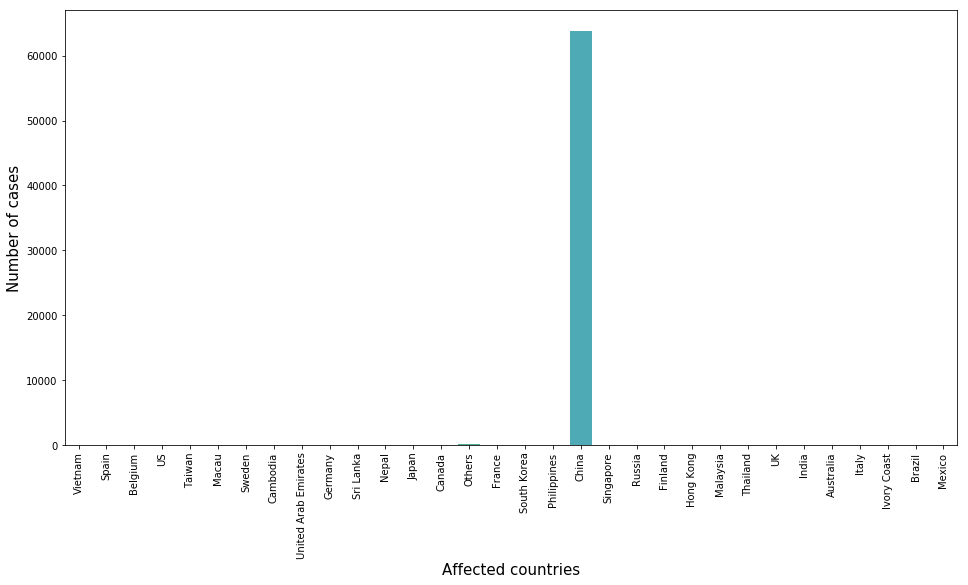

In [29]:
# Plot number of cases in different countries
plt.rcParams['figure.figsize']=(16,8)
sns.barplot(x='Country', y='Confirmed', data=case_c)
plt.xticks(rotation=90)
plt.xlabel('Affected countries',fontsize=15)
plt.ylabel('Number of cases',fontsize=15)

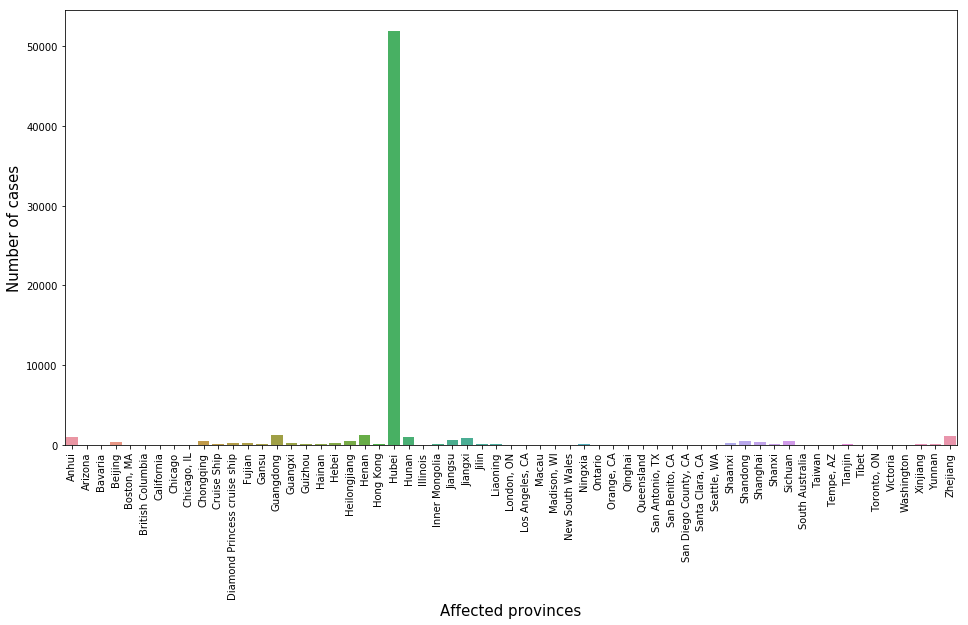

In [19]:
# Number of cases in different provinces in China
case_ps.rename(columns={'Province/State':'Province'}, inplace=True)
sns.barplot(x='Province', y='Confirmed', data=case_ps)
plt.xticks(rotation=90)
plt.xlabel('Affected provinces',fontsize=15)
plt.ylabel('Number of cases',fontsize=15)
plt.rcParams['figure.figsize']=(16,8)

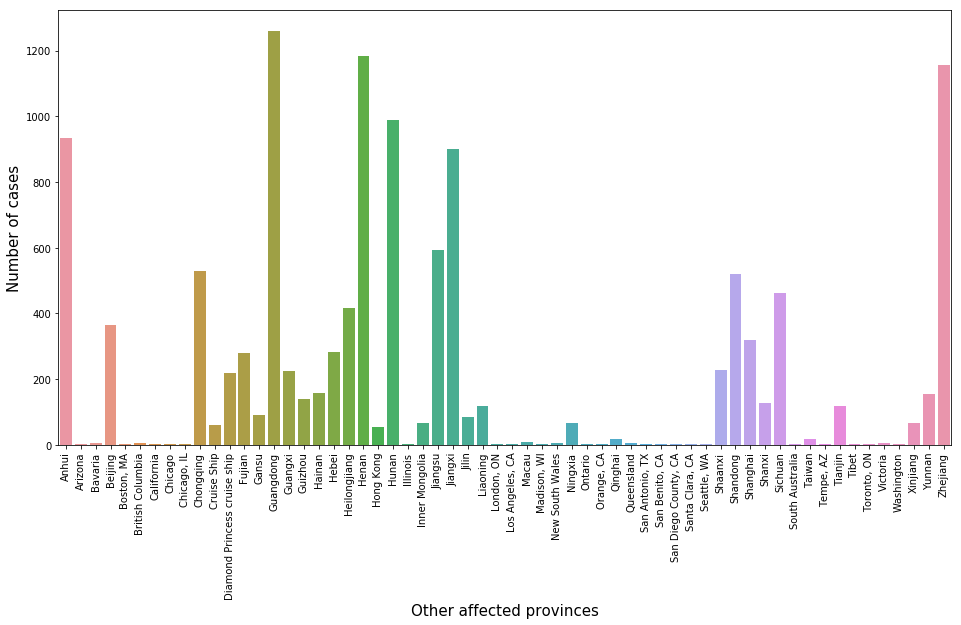

In [20]:
# Number of cases in Provinces other than Hubei
sns.barplot(x='Province', y='Confirmed', data=case_ps[case_ps.Province!='Hubei'])
plt.xticks(rotation=90)
plt.xlabel('Other affected provinces',fontsize=15)
plt.ylabel('Number of cases',fontsize=15)
plt.rcParams['figure.figsize']=(16,8)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


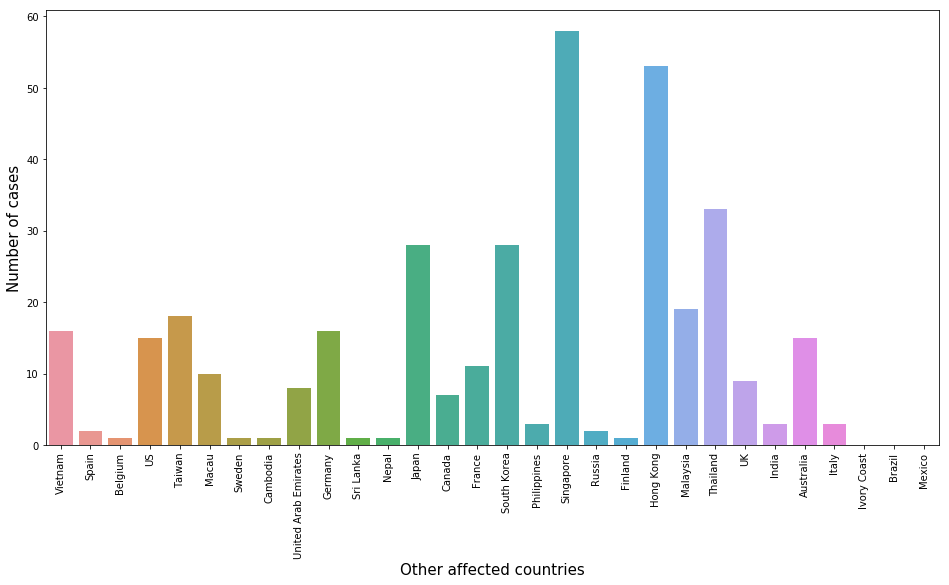

In [22]:
# Number of cases in countries other than China
sns.barplot(x='Country', y='Confirmed', data=case_c[case_c.Country!='China'][case_c.Country!='Others'])
plt.xticks(rotation=90)
plt.xlabel('Other affected countries',fontsize=15)
plt.ylabel('Number of cases',fontsize=15)
plt.rcParams['figure.figsize']=(16,8)

In [23]:
# Time-series analysis
df_date = df.groupby('Date', as_index=False)[['Confirmed','Deaths','Recovered']].sum()
df_date

,Date,Confirmed,Deaths,Recovered
0,01/22/2020 12:00:00,555.0,0.0,0.0
1,01/23/2020 12:00:00,653.0,18.0,30.0
2,01/24/2020 12:00:00,941.0,26.0,36.0
3,01/25/2020 22:00:00,2019.0,56.0,49.0
4,01/26/2020 23:00:00,2794.0,80.0,54.0
5,01/27/2020 20:30:00,4473.0,107.0,63.0
6,01/28/2020 23:00:00,6057.0,132.0,110.0
7,01/29/2020 21:00:00,7783.0,170.0,133.0
8,01/30/2020 21:30:00,9776.0,213.0,187.0
9,01/31/2020 19:00:00,11374.0,259.0,252.0


In [24]:
# If Timestamp is required, run the following code
# df['Timestamp'] = pd.to_datetime(df['Date']).astype(int)/10**10
df_date['Date'] = pd.to_datetime(df_date['Date']).dt.date # Converting date-time to date
df_date

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,555.0,0.0,0.0
1,2020-01-23,653.0,18.0,30.0
2,2020-01-24,941.0,26.0,36.0
3,2020-01-25,2019.0,56.0,49.0
4,2020-01-26,2794.0,80.0,54.0
5,2020-01-27,4473.0,107.0,63.0
6,2020-01-28,6057.0,132.0,110.0
7,2020-01-29,7783.0,170.0,133.0
8,2020-01-30,9776.0,213.0,187.0
9,2020-01-31,11374.0,259.0,252.0


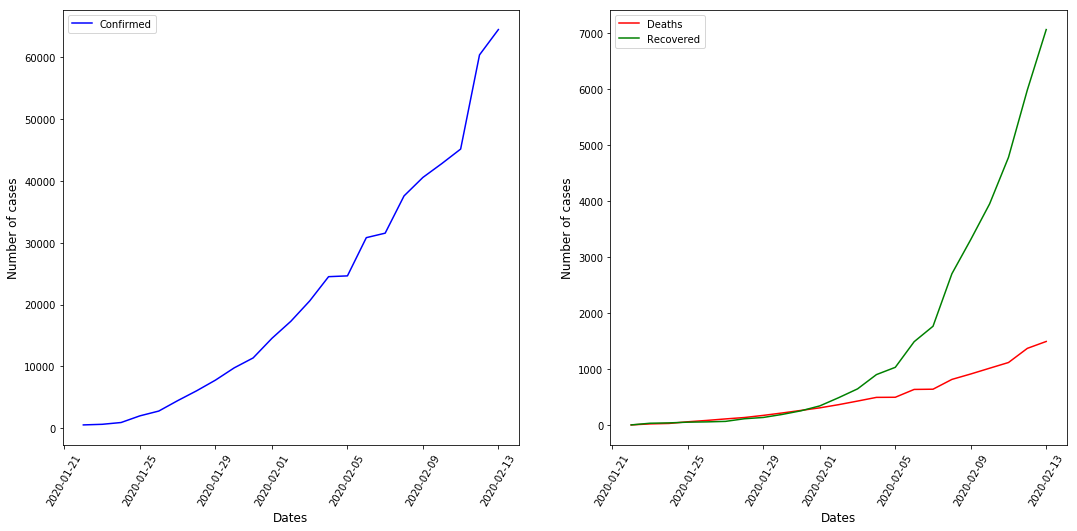

In [26]:
# Plot the cases
plt.subplot(1,2,1)
plt.plot('Date', 'Confirmed', data=df_date.groupby(['Date']).sum().reset_index(), color='blue')
plt.xticks(rotation=60)
plt.xlabel('Dates',fontsize=12)
plt.ylabel('Number of cases',fontsize=12)
plt.legend()

plt.subplot(1,2,2)
plt.plot('Date', 'Deaths', data=df_date.groupby(['Date']).sum().reset_index(), color='red')
plt.plot('Date', 'Recovered', data=df_date.groupby(['Date']).sum().reset_index(), color='green')
plt.xticks(rotation=60)
plt.xlabel('Dates',fontsize=12)
plt.ylabel('Number of cases',fontsize=12)
plt.legend()

plt.rcParams['figure.figsize']=(18,8)
plt.show()

In [27]:
# Merge world coordinates with nCoV dataframe
wc_df = pd.merge(wc,case_c,on='Country')
wc_df.drop(['Code','Date','Deaths','Recovered'], axis=1, inplace=True)
wc_df

,Country,latitude,longitude,Confirmed
0,United Arab Emirates,23.424076,53.847818,8.0
1,Australia,-25.274398,133.775136,15.0
2,Belgium,50.503887,4.469936,1.0
3,Brazil,-14.235004,-51.925280,0.0
4,Canada,56.130366,-106.346771,7.0
5,China,35.861660,104.195397,63841.0
6,Germany,51.165691,10.451526,16.0
7,Spain,40.463667,-3.749220,2.0
8,Finland,61.924110,25.748151,1.0
9,France,46.227638,2.213749,11.0


In [28]:
# Folium Heatmap
heatmap = folium.Map(location=[35.861660, 104.195397], zoom_start=3)

heat_data = [[row['latitude'],row['longitude']] for index, row in wc_df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(heatmap)

# Display the map
heatmap